In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set_theme()

In [3]:
df = pd.DataFrame(columns=["n", "t"])

In [4]:
for i in range(1, 36):
    temp = pd.read_csv("../build/{}.txt".format(i), header=None).rename({0: "t"}, axis=1)
    temp["n"] = i
    df = df.append(temp)

In [5]:
df["n"] = df["n"].astype(np.float)
df["t"] = df["t"].astype(np.float)

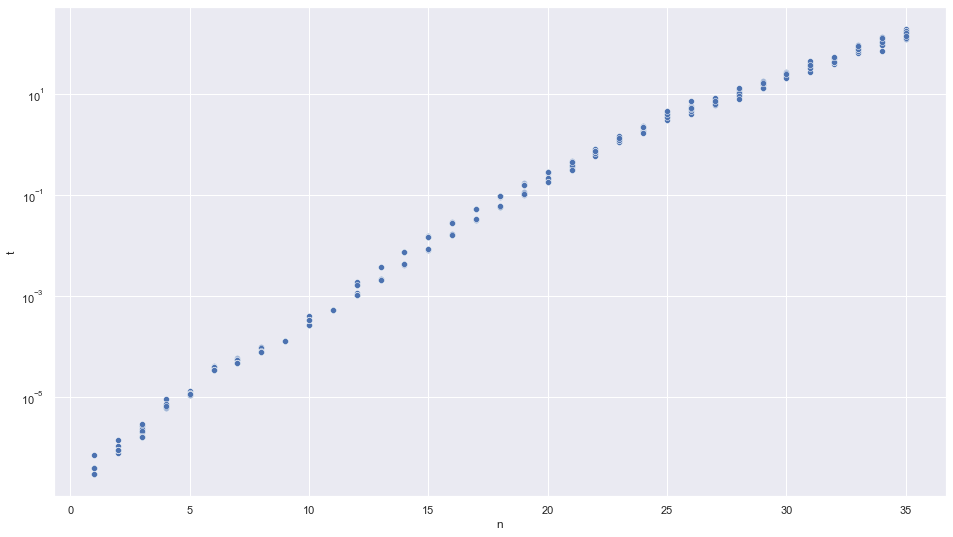

In [6]:
plt.figure(figsize=(16, 9))
ax = sns.scatterplot(x="n", y="t", estimator=np.mean, data=df)
ax.set_yscale("log")

In [7]:
df["t_mean"] = df.groupby("n")["t"].transform("mean")
df["t_std"] = df.groupby("n")["t"].transform("std")

In [8]:
df = df.drop("t", axis=1).drop_duplicates(ignore_index=True)

In [9]:
t_n_median = df.loc[df["n"] == 17, "t_mean"].values[0]

In [10]:
c = t_n_median / 2**17

In [11]:
t_n_median

0.040552069999999996

In [12]:
c

3.0938774108886715e-07

In [13]:
df["q"] = df["t_mean"] / (c*2**df["n"])

In [14]:
df["n"] = df["n"].astype(np.int)

In [15]:
df

,n,t_mean,t_std,q
0,1,3.800000e-07,1.229273e-07,0.614116
1,2,9.600000e-07,1.712698e-07,0.775726
2,3,2.060000e-06,4.857983e-07,0.832289
3,4,6.760000e-06,8.579044e-07,1.365600
4,5,1.154000e-05,7.589466e-07,1.165609
5,6,3.783000e-05,2.573389e-06,1.910527
6,7,5.068000e-05,4.889399e-06,1.279745
7,8,8.280000e-05,7.227109e-06,1.045411
8,9,1.288500e-04,1.635203e-06,0.813413
9,10,3.052400e-04,4.667372e-05,0.963470


In [16]:
df.to_csv("naive.csv", index=False)